<h1><center>Data Visualization Project</center></h1>

# Exploratory Data Analysis 

# First Dataset: Google Play Store Apps
https://www.kaggle.com/datasets/lava18/google-play-store-apps/code?datasetId=49864&language=Python&outputs=Visualization&tagIds=13201%2C16614

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from pylab import rcParams 
import statsmodels.api as sm

plt.style.use('default')

## Collect and Prepare the Data.

In [2]:
# Importing the dataset
data= pd.read_csv("googleplaystore.csv")

# Printing firt 5 columns of the dataframe
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
# Number of rows and columns of the dataframe
data.shape

(10841, 13)

In [4]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))
                                                                        

There are 10841 observations and 13 features in this dataset. 



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
# A statistical summary for quantitative data
data.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [8]:
data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

Notice that Rating= 19 is an outlier

In [9]:
# The number of unique Applications
data['App'].nunique()

9660

In [10]:
# The number of unique Categories
data['Category'].nunique()

34

In [11]:
# The number of unique Genres
data['Genres'].nunique()

120

The two attributes 'Category' and 'Genres' contains almost the same information, except that 'Genres' contains some more details about some categories.

In [12]:
print(data['Content Rating'].unique())
data['Content Rating'].nunique()

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


6

In [13]:
# The number of unique Android Versions
data['Android Ver'].nunique()

33

In [14]:
# Groupby by Type
Type = data.groupby("Type")

# Summary statistic of all Types
Type.describe()

Rating                                                   
       count       mean       std   min   25%   50%   75%   max
Type                                                           
0        1.0  19.000000       NaN  19.0  19.0  19.0  19.0  19.0
Free  8719.0   4.186203  0.512338   1.0   4.0   4.3   4.5   5.0
Paid   647.0   4.266615  0.547523   1.0   4.1   4.4   4.6   5.0

In [15]:
# For loop to find the Statistics of each Column and its Type.

for i in list(data.columns):
    
    print()
    print("************"+i+"************")
    print()
    print(data[i].value_counts())
    print()
    print(data[i].describe())


************App************

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
DW Amharic by AudioNow Digital                       1
Hesab.af - Send money in Afghanistan                 1
Account Class-11 Solutions (D K Goel)                1
A-Z Screen Recorder -                                1
Real Estate by Movoto                                1
Name: App, Length: 9660, dtype: int64

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

************Category************

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
CO

## Data Cleaning

In [16]:
data.drop(data.index[data['Installs'] =='Free'], inplace = True)
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [17]:
data.drop_duplicates(inplace= True)
data.duplicated().sum()

0

In [18]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))                                                               

There are 10357 observations and 13 features in this dataset. 



In [19]:
# Converting the data in the column "Reviews" to float to that we can apply summary statistics
data.Reviews= data.Reviews.astype(float)

In [20]:
# Converting the column "Size" to float
# There are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"

# Removing "M" which is the mb for the size
data.Size= data["Size"].str.replace("M", "")
data.Size= data['Size'].str.replace("Varies with device","-1")

#Here we replace k and change the unit to Mb
data['Size']=data['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

In [21]:
# Convert the data in "Price" to float
# Removing "$" from the data entries in the column "Price" so that it can be converted to float
data["Price"]= data["Price"].str.replace("$", "")
# Convert the data in "Price" to float
data["Price"]= data.Price.astype(float)

In [22]:
# To convert the column "Installs" into float
# So, firstly remove the "+"
data.Installs= data["Installs"].str.replace("+", "")

# While converting the column into float,we have to remove ',' to
# So, removing the commas
data.Installs= data["Installs"].str.replace(",", "")


# Convert the data in "Installs" to numeric
data["Installs"] = pd.to_numeric(data["Installs"])

Installs is equivalent to the minimum number of the installs of a certain application.

In [23]:
# Replacing Rating= 19 (outlier) by 1.9 
data[data['Rating'] == 19]= 1.9

In [24]:
data['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

### Histogram

In [25]:
# Task Abstraction: Shows the count of each type of the applications (free or paid)
# Annotate the count on each bar

y=data["Type"].value_counts()
fig=px.histogram(data,x="Type",title='Values Count for each Type of The Applications')
fig.update_traces(marker_line_color="black",marker_line_width=2, opacity=0.6, text=y,
                  marker_color=["red","cyan"],textfont=dict(size=20))
fig.show()

In [26]:
data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [27]:
data.groupby(['App']).mean()

Rating  Reviews   Installs  \
App                                                                            
"i DT" Fútbol. Todos Somos Técnicos.                 NaN     27.0      500.0   
+Download 4 Instagram Twitter                        4.5  40467.0  1000000.0   
- Free Comics - Comic Apps                           3.5    115.0    10000.0   
.R                                                   4.5    259.0    10000.0   
/u/app                                               4.7    573.0    10000.0   
...                                                  ...      ...        ...   
뽕티비 - 개인방송, 인터넷방송, BJ방송                              NaN    414.0   100000.0   
💎 I'm rich                                           3.8    718.0    10000.0   
💘 WhatsLov: Smileys of love, stickers and GIF        4.6  22098.0  1000000.0   
📏 Smart Ruler ↔️ cm/inch measuring for homework!     4.0     19.0    10000.0   
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     4.7  11661.0  1000000.0   

                                                   Price  
App                                                       
"i DT" Fútbol. Todos Somos Técnicos.                0.00  
+Download 4 Instagram Twitter                       0.00  
- Free Comics - Comic Apps                          0.00  
.R                                                  0.00  
/u/app                                              0.00  
...                                                  ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                             0.00  
💎 I'm rich                                        399.99  
💘 WhatsLov: Smileys of love, stickers and GIF       0.00  
📏 Smart Ruler ↔️ cm/inch measuring for homework!    0.00  
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    0.00  

[9659 rows x 4 columns]

In [28]:
data['Rating']= data['Rating'].fillna(0)
data.groupby(['App']).mean()

Rating  Reviews   Installs  \
App                                                                            
"i DT" Fútbol. Todos Somos Técnicos.                 0.0     27.0      500.0   
+Download 4 Instagram Twitter                        4.5  40467.0  1000000.0   
- Free Comics - Comic Apps                           3.5    115.0    10000.0   
.R                                                   4.5    259.0    10000.0   
/u/app                                               4.7    573.0    10000.0   
...                                                  ...      ...        ...   
뽕티비 - 개인방송, 인터넷방송, BJ방송                              0.0    414.0   100000.0   
💎 I'm rich                                           3.8    718.0    10000.0   
💘 WhatsLov: Smileys of love, stickers and GIF        4.6  22098.0  1000000.0   
📏 Smart Ruler ↔️ cm/inch measuring for homework!     4.0     19.0    10000.0   
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     4.7  11661.0  1000000.0   

                                                   Price  
App                                                       
"i DT" Fútbol. Todos Somos Técnicos.                0.00  
+Download 4 Instagram Twitter                       0.00  
- Free Comics - Comic Apps                          0.00  
.R                                                  0.00  
/u/app                                              0.00  
...                                                  ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                             0.00  
💎 I'm rich                                        399.99  
💘 WhatsLov: Smileys of love, stickers and GIF       0.00  
📏 Smart Ruler ↔️ cm/inch measuring for homework!    0.00  
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    0.00  

[9659 rows x 4 columns]

Nan is equivalent to 0 out of 5 Rating.

In [29]:
# Dropping the entries where there are missing values
data.dropna(inplace= True)

In [30]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [31]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])

## Data Visualisation 

### Which genres appear most frequently?

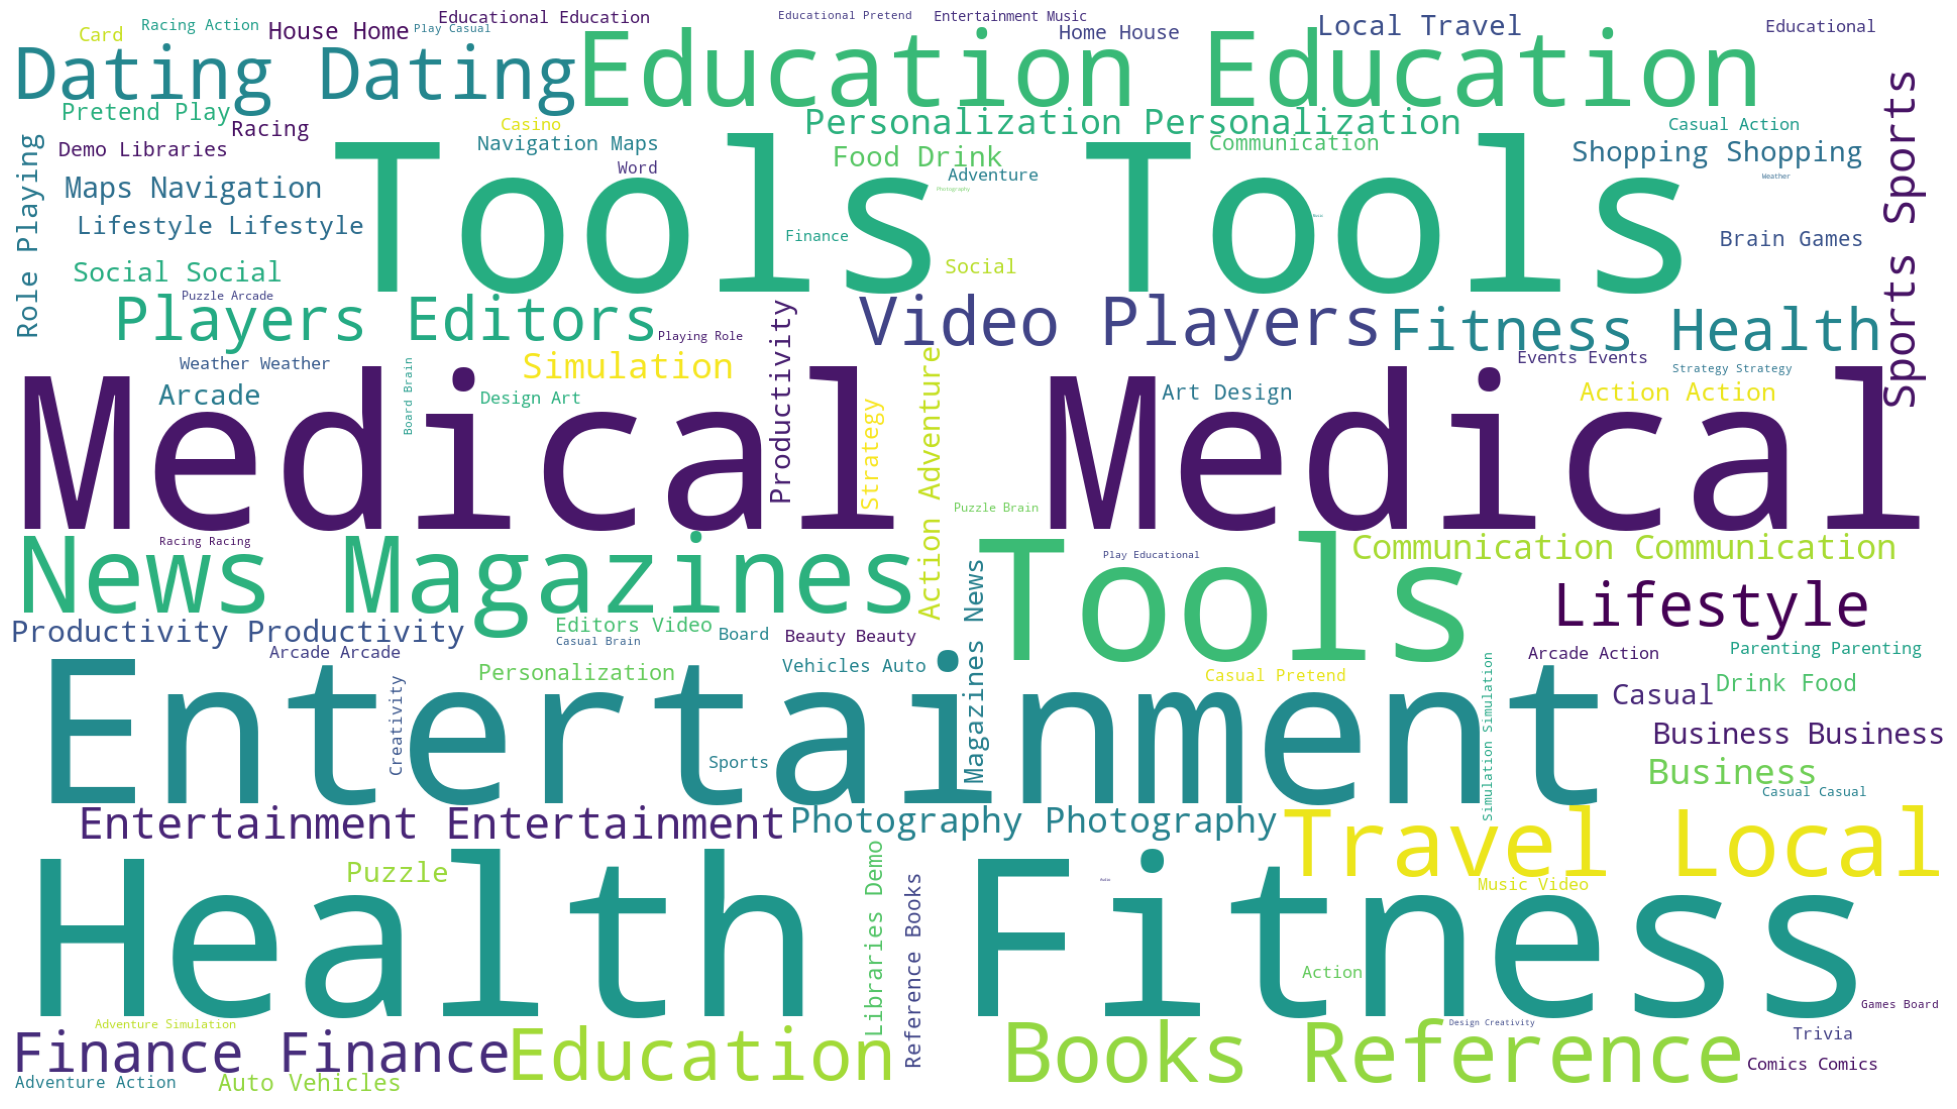

In [32]:
# As a column "Genres" Type is String then We use wordcloud visual which concatenates all columns and represents 
# them as cloud and the font is adjustable due to the frequency of each word in this columns.

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color="white"
                          ,width=1920,
                          height=1080
                         ).generate(" ".join(data.Genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### For Stakeholders, what are the most attractive applications that they can invest in after taking into consideration the ratings out of 5?

### Bar Chart

In [33]:
# Task Abstraction:Show the ratings for the most famous Five applications and show their categories.
# 1. Sorting in descending order The dataset by the number of installations.
# 2.Extract the TopN (5)
# 3.Construct this chart as X is the name of Applications and Y is the Rating of the the Top 7 
# 4.Using the color as Third variable  for the Caterories.

Graph2= data.sort_values(by='Installs', ascending=False ,inplace=False).head(7)
fig = px.bar(Graph2, x='App', y='Rating',color='Category',range_y=[0,5])
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Graph2

App            Category  Rating     Reviews Size  \
336          WhatsApp Messenger       COMMUNICATION     4.4  69119316.0   -1   
2554                    Google+              SOCIAL     4.2   4831125.0   -1   
3127         Google Street View    TRAVEL_AND_LOCAL     4.2   2129689.0   -1   
3816                Google News  NEWS_AND_MAGAZINES     3.9    877643.0   13   
3223  Maps - Navigate & Explore    TRAVEL_AND_LOCAL     4.3   9235373.0   -1   
2545                  Instagram              SOCIAL     4.5  66577313.0   -1   
2544                   Facebook              SOCIAL     4.1  78158306.0   -1   

          Installs  Type  Price Content Rating            Genres Last Updated  \
336   1.000000e+09  Free    0.0       Everyone     Communication   2018-08-03   
2554  1.000000e+09  Free    0.0           Teen            Social   2018-07-26   
3127  1.000000e+09  Free    0.0       Everyone    Travel & Local   2018-08-06   
3816  1.000000e+09  Free    0.0           Teen  News & Magazines   2018-08-01   
3223  1.000000e+09  Free    0.0       Everyone    Travel & Local   2018-07-31   
2545  1.000000e+09  Free    0.0           Teen            Social   2018-07-31   
2544  1.000000e+09  Free    0.0           Teen            Social   2018-08-03   

             Current Ver         Android Ver  
336   Varies with device  Varies with device  
2554  Varies with device  Varies with device  
3127  Varies with device  Varies with device  
3816               5.2.0          4.4 and up  
3223  Varies with device  Varies with device  
2545  Varies with device  Varies with device  
2544  Varies with device  Varies with device

# Are these ratings  trustworthy and the Sample of reviewers is representitative for the Top 5? 
 

### Pie Chart

In [34]:
# Task Abstraction: Show the number of reviewers for the most famous Five applications.
# Visual ecoding by human Interaction: Notice... Is is that reasonable to make decisions regarding
# one or two -out of five applications- that showing they are the best one for stakeholders to invest in?
# 1.Show the Number (percentages) of Reviews by the sectors of the pie which represent the names of Top 5 applications  

fig = px.pie(Graph2, values='Reviews', names='App',color='App', title='Number of Reviews for the TopN Applications')
fig.show()

Graph2

App            Category  Rating     Reviews Size  \
336          WhatsApp Messenger       COMMUNICATION     4.4  69119316.0   -1   
2554                    Google+              SOCIAL     4.2   4831125.0   -1   
3127         Google Street View    TRAVEL_AND_LOCAL     4.2   2129689.0   -1   
3816                Google News  NEWS_AND_MAGAZINES     3.9    877643.0   13   
3223  Maps - Navigate & Explore    TRAVEL_AND_LOCAL     4.3   9235373.0   -1   
2545                  Instagram              SOCIAL     4.5  66577313.0   -1   
2544                   Facebook              SOCIAL     4.1  78158306.0   -1   

          Installs  Type  Price Content Rating            Genres Last Updated  \
336   1.000000e+09  Free    0.0       Everyone     Communication   2018-08-03   
2554  1.000000e+09  Free    0.0           Teen            Social   2018-07-26   
3127  1.000000e+09  Free    0.0       Everyone    Travel & Local   2018-08-06   
3816  1.000000e+09  Free    0.0           Teen  News & Magazines   2018-08-01   
3223  1.000000e+09  Free    0.0       Everyone    Travel & Local   2018-07-31   
2545  1.000000e+09  Free    0.0           Teen            Social   2018-07-31   
2544  1.000000e+09  Free    0.0           Teen            Social   2018-08-03   

             Current Ver         Android Ver  
336   Varies with device  Varies with device  
2554  Varies with device  Varies with device  
3127  Varies with device  Varies with device  
3816               5.2.0          4.4 and up  
3223  Varies with device  Varies with device  
2545  Varies with device  Varies with device  
2544  Varies with device  Varies with device

### Which Content Rating and Category are the profitable one for the Stakeholders to publish their app?


In [35]:
# Treemap

# Task Abstraction:Decide which combination of content rating and catergory are the best for the the stakeholders or
# Reflect what the trends are in the mobile applications industry.

# 0:Grouping the dataset by content Rating and Category and aggregate the ratings as means.
# 1. Sorting This group by the Ratings in descending order .
# 2.Extract the TopN (20)
# 3.Construct this map as  the parent is  the content Rating and the child is the Categories. 
# 4.Using the color as Third variable  for as a grading system for the values of Ratings .

Graph=data.groupby(['Category', 'Content Rating']).mean()
Graph3=Graph.sort_values(by='Rating', ascending=False ,inplace=False).head(20)
print(Graph3.describe())

reset_indx1 = Graph3.reset_index()
reset_indx1

          Rating        Reviews      Installs      Price
count  20.000000      20.000000  2.000000e+01  20.000000
mean    4.524526  149421.902094  6.472201e+06   0.221921
std     0.134705  204993.989040  1.209923e+07   0.958100
min     4.337190      84.000000  1.000000e+03   0.000000
25%     4.400000    6877.625000  4.500000e+05   0.000000
50%     4.490000   68479.500000  1.751000e+06   0.000000
75%     4.612500  202169.600000  7.300000e+06   0.000000
max     4.800000  751551.000000  5.275000e+07   4.290000


Category   Content Rating    Rating        Reviews  \
0             EDUCATION             Teen  4.800000  256079.000000   
1               WEATHER       Mature 17+  4.700000   20001.000000   
2             PARENTING             Teen  4.700000     107.000000   
3        ART_AND_DESIGN     Everyone 10+  4.700000    7699.000000   
4        HOUSE_AND_HOME             Teen  4.650000    1391.500000   
5      TRAVEL_AND_LOCAL       Mature 17+  4.600000  751551.000000   
6          PRODUCTIVITY       Mature 17+  4.600000      84.000000   
7             PARENTING       Mature 17+  4.600000    1413.000000   
8                 TOOLS             Teen  4.500000  256684.400000   
9                SPORTS  Adults only 18+  4.500000   50017.000000   
10            EDUCATION     Everyone 10+  4.480000  131942.600000   
11       ART_AND_DESIGN             Teen  4.466667   86942.000000   
12  BOOKS_AND_REFERENCE     Everyone 10+  4.460000  150867.600000   
13              WEATHER             Teen  4.450000    4413.500000   
14              WEATHER     Everyone 10+  4.400000  260137.000000   
15          PHOTOGRAPHY       Mature 17+  4.400000  601405.500000   
16  MAPS_AND_NAVIGATION             Teen  4.400000   29267.500000   
17      PERSONALIZATION     Everyone 10+  4.380000  184199.800000   
18   HEALTH_AND_FITNESS       Mature 17+  4.366667   10656.666667   
19            EDUCATION         Everyone  4.337190  183578.975207   

        Installs    Price  
0   1.000000e+06  0.00000  
1   1.000000e+06  0.00000  
2   5.000000e+04  0.00000  
3   5.000000e+05  0.00000  
4   2.550000e+05  0.00000  
5   1.000000e+07  0.00000  
6   1.000000e+03  4.29000  
7   1.000000e+05  0.00000  
8   1.200402e+07  0.00000  
9   1.000000e+06  0.00000  
10  6.400000e+06  0.00000  
11  2.000333e+07  0.00000  
12  4.222000e+06  0.00000  
13  3.000000e+05  0.00000  
14  1.000000e+07  0.00000  
15  5.275000e+07  0.00000  
16  2.550000e+06  0.00000  
17  2.502000e+06  0.00000  
18  6.835000e+05  0.00000  
19  4.123157e+06  0.14843

### Tree Map

In [36]:
fig = px.treemap(reset_indx1,
    path=['Content Rating', 'Category'],
    values='Rating',
    color='Rating',
    color_continuous_scale=["red", "white", "green"],
    title="Content Rating/ Category Overview")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Box Plot

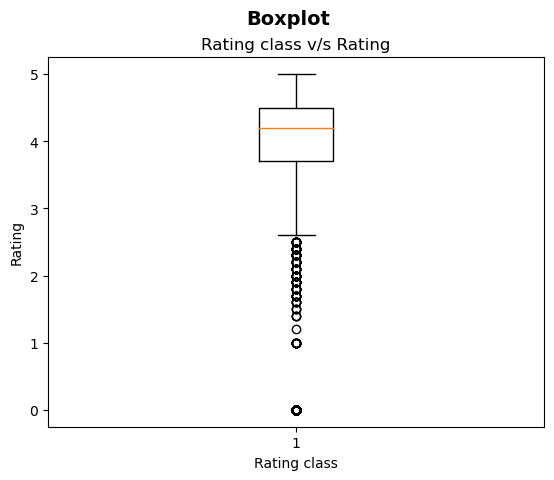

In [37]:
# Boxplot of 'Rating' variable
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(data['Rating'])
ax.set_title('Rating class v/s Rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')
plt.show()

### Distribution Plot

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



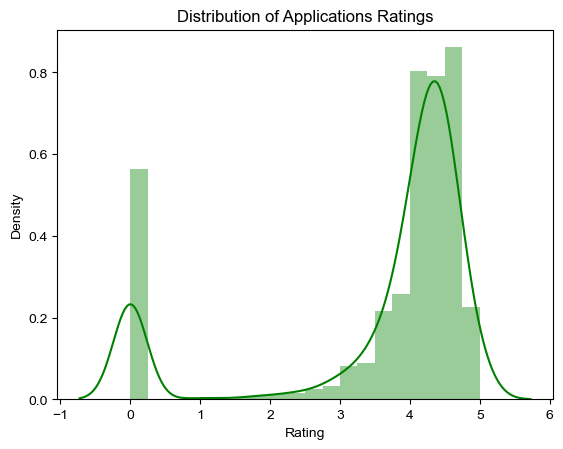

In [38]:
# Distribution Plot for Ratings
sb.distplot(data.Rating, bins=20, color="g")
sb.set_style("white")
plt.title("Distribution of Applications Ratings", fontsize=12)
plt.show()

### Histogram

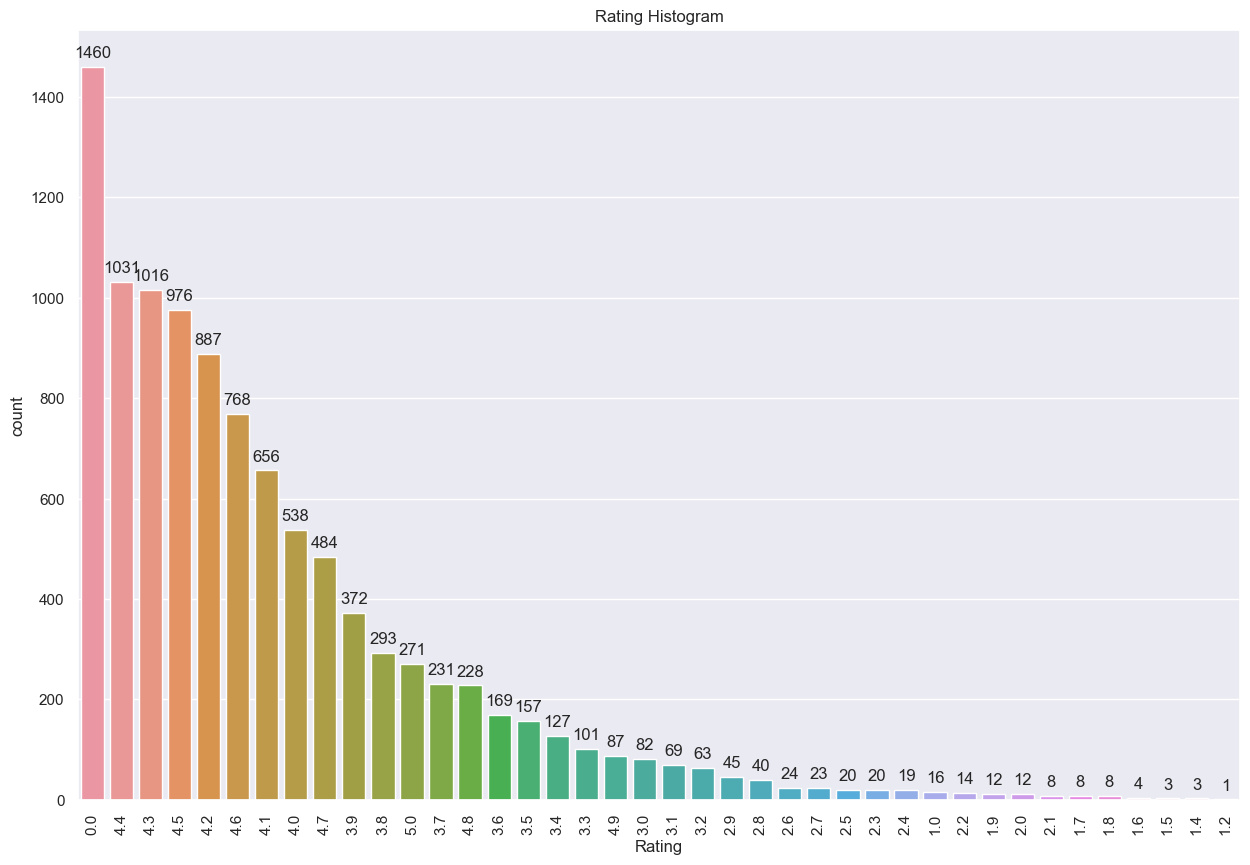

In [39]:
# Rating vs Count Bar Plot
# Sorted descendingly

plt.figure(figsize=(15,10))
sb.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Rating Histogram")
ax = sb.countplot(x="Rating", data=data, order = data['Rating'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Vertical Box Plots

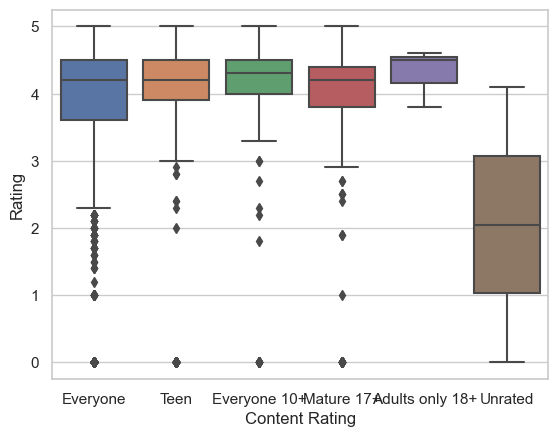

In [40]:
# A vertical boxplot of 'Rating' attribute grouped by a categorical variable 'Content Rating'
sb.set_style("whitegrid")
sb.boxplot(x = 'Content Rating', y = 'Rating', data = data);

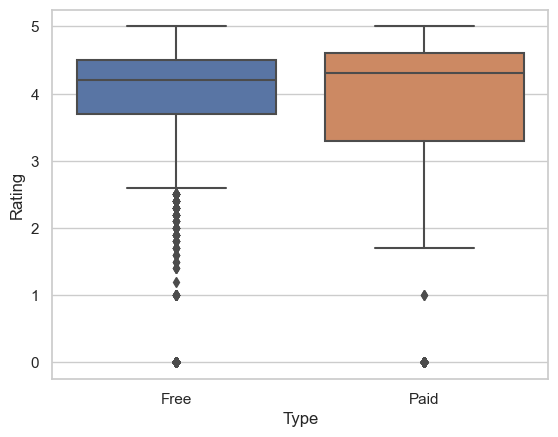

In [41]:
# A vertical boxplot of 'Rating' attribute grouped by a categorical variable 'Type'
sb.set_style("whitegrid")
sb.boxplot(x = 'Type', y = 'Rating', data = data);

### Scatter Plots

In [42]:
fig = px.scatter(data, x="Installs", y="Reviews")
fig.show()

In [43]:
fig = px.scatter(data, x="Rating", y="Reviews", color="Content Rating")
fig.show()

### Kernel Density Plot

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



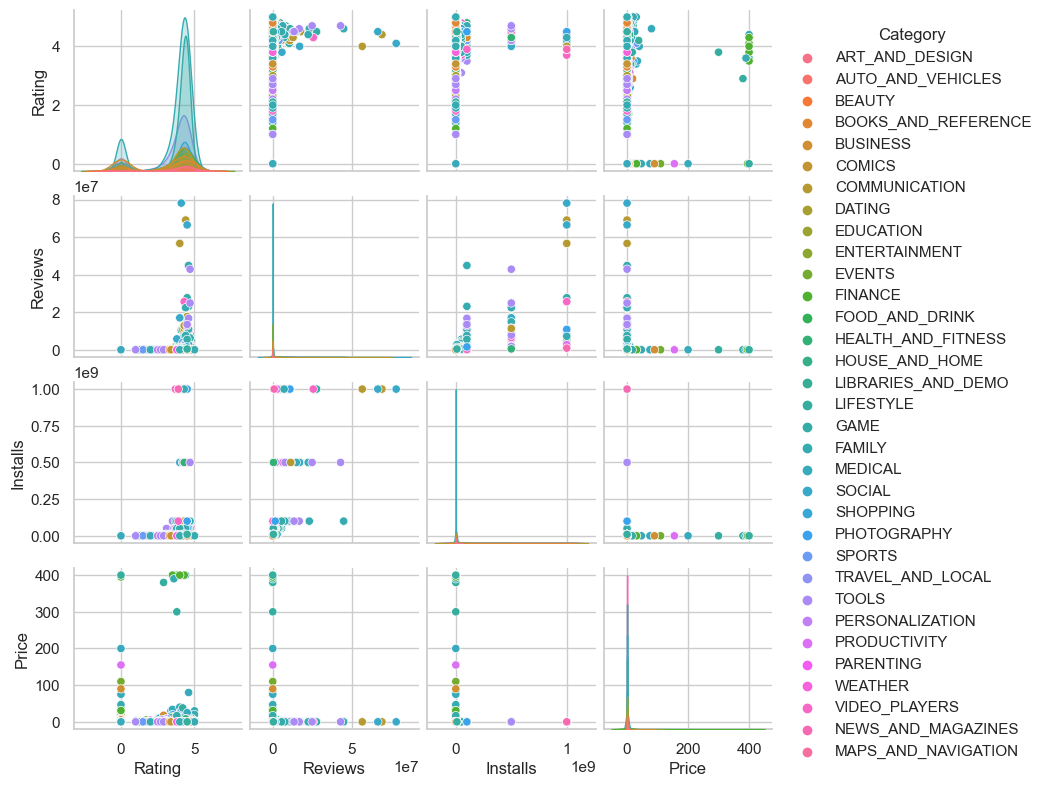

In [44]:
# Kernel Density plots grouped by Category
sb.pairplot(data, hue='Category', height=2, diag_kind="kde"); 

### Correlation Heatmap

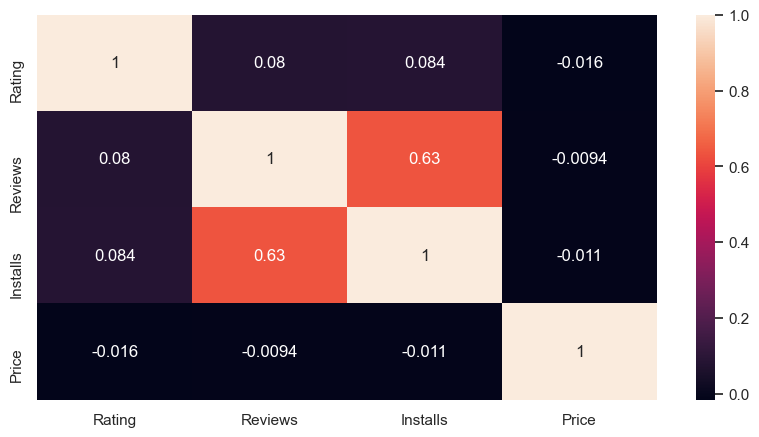

In [45]:
plt.figure(figsize=(10,5))
corr= data.corr()
sb.heatmap(corr, annot=True)
plt.show()

### Histogram

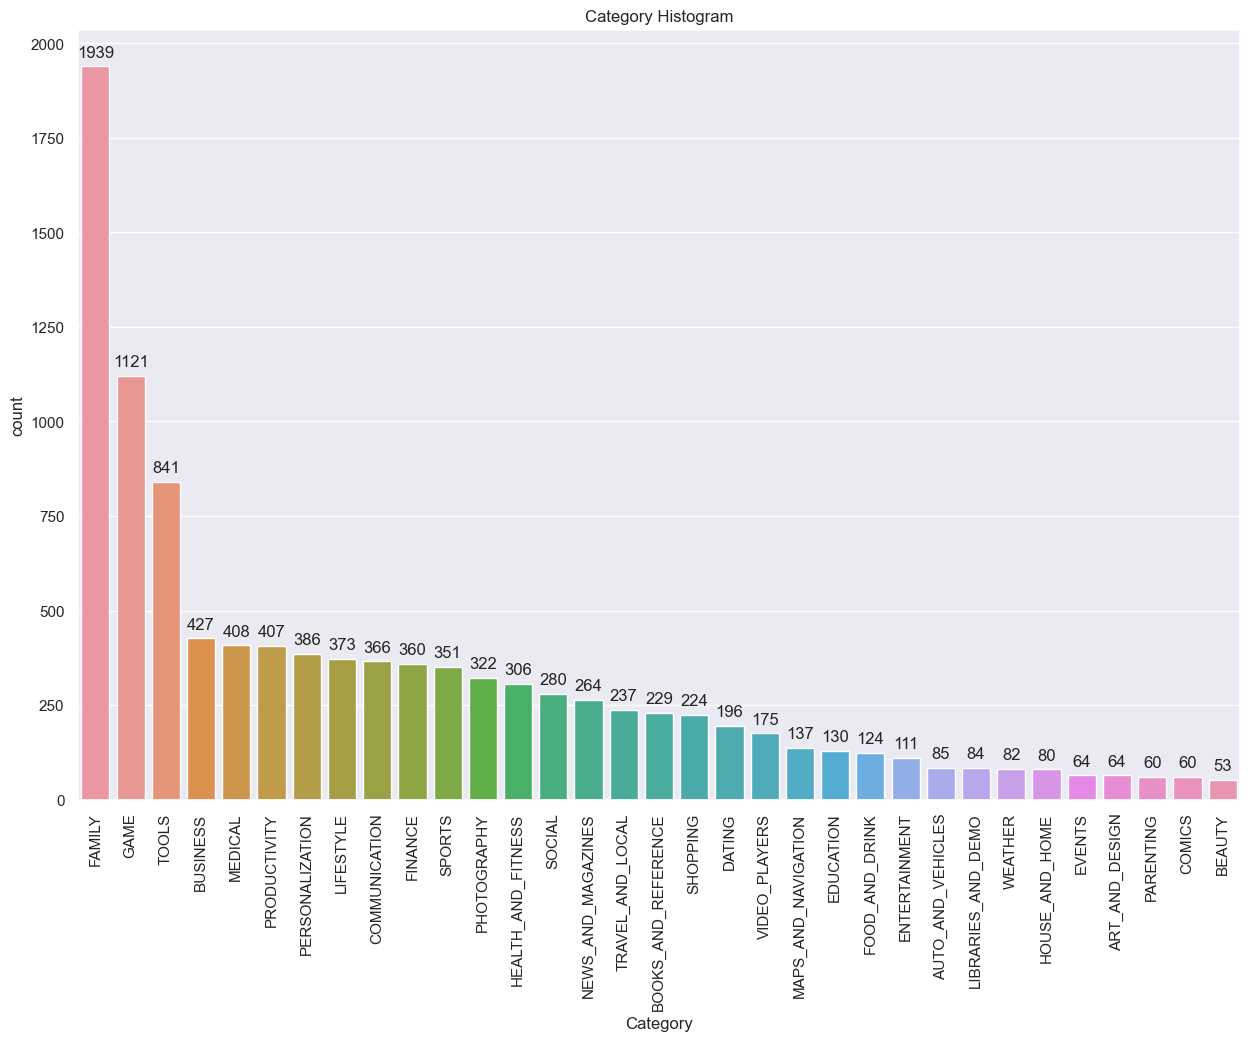

In [46]:
# Category vs Count Bar 
plt.figure(figsize=(15,10))
sb.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Category Histogram")
ax = sb.countplot(x="Category", data=data, order = data['Category'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Simple Bar Graph

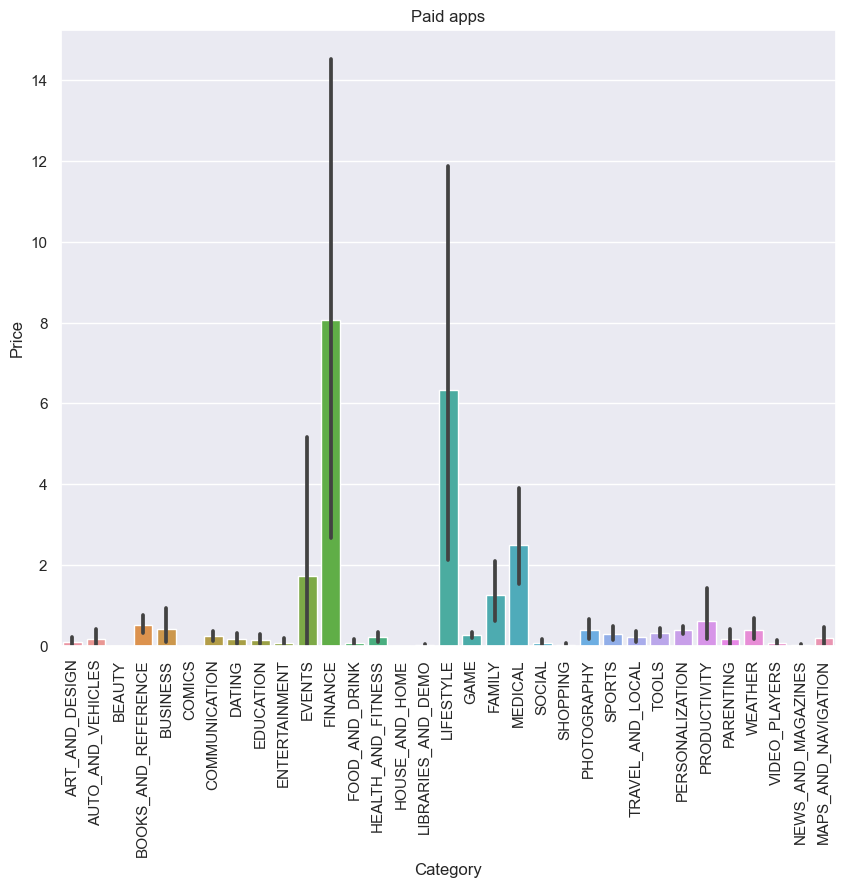

In [47]:
# Let's look at why 'Family' Category does not have the highest number of installs even though it has lot of applications.
# Price could be one of the factors
paid_apps = data[data["Price"] != 0.0]

paid_family_apps = data[data["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = data[data["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(10,8))
sb.barplot(x="Category", y="Price", data=data, label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()

### Joint Scatter Plot

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



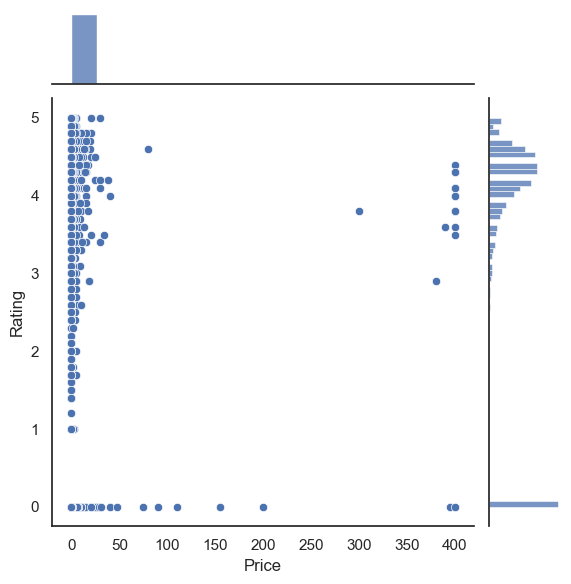

In [48]:
# Joint Scatter Plot for Size vs Rating
sb.set_style("white")
sb.jointplot(data.Price, data.Rating)
plt.show()

### Regression Plot

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



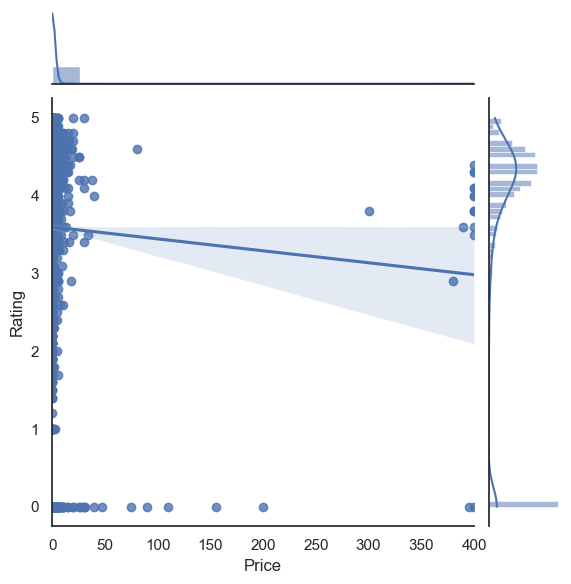

In [49]:
# Regression Plot for Price and Rating to observe the trend
sb.jointplot(data.Price, data.Rating, kind="reg")
plt.show()

### Box Plot

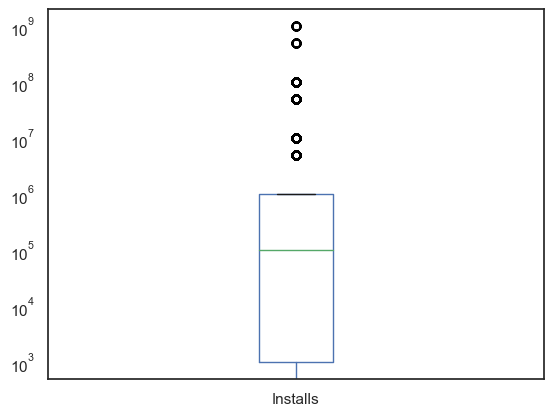

In [50]:
# Boxplot of 'Installs' attribute
data['Installs'].plot(kind='box');
# Converts the scale of data values to visualise a meaningful boxplot
plt.semilogy();

In [51]:
# Analyse the Content Rating column
data['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [52]:
# Remove the rows with values which are less representing 
data = data[~data['Content Rating'].isin(["Adults only 18+","Unrated"])]

# Reset the index
data.reset_index(inplace=True, drop=True)

# Check the apps belonging to different categories of Content Rating 
data['Content Rating'].value_counts()

Everyone        8372
Teen            1146
Mature 17+       447
Everyone 10+     376
Name: Content Rating, dtype: int64

### Pie Chart

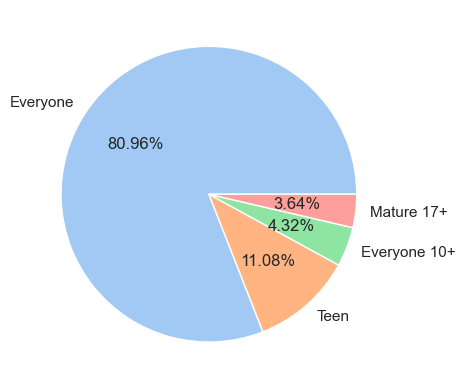

In [53]:
# Pie chart for 'Content Rating'
# Define Seaborn color palette to use
colors = sb.color_palette('pastel')[0:4]
plt.pie(data['Content Rating'].value_counts(), labels = data['Content Rating'].unique(), 
        colors = colors, autopct='%.2f%%')
plt.show()

In [54]:
print(data['Last Updated'].min())
print(data['Last Updated'].max())

2010-05-21 00:00:00
2018-08-08 00:00:00


In [55]:
ts_data = data.sort_values('Last Updated').groupby('Last Updated')['Reviews'].count().reset_index()
ts_data

Last Updated  Reviews
0      2010-05-21        1
1      2011-01-30        1
2      2011-03-16        1
3      2011-04-11        1
4      2011-04-16        1
...           ...      ...
1370   2018-08-04       96
1371   2018-08-05       49
1372   2018-08-06      141
1373   2018-08-07       41
1374   2018-08-08        5

[1375 rows x 2 columns]

In [56]:
ts_data = ts_data.set_index('Last Updated')
ts_data.index

DatetimeIndex(['2010-05-21', '2011-01-30', '2011-03-16', '2011-04-11',
               '2011-04-16', '2011-04-18', '2011-05-12', '2011-06-23',
               '2011-06-26', '2011-06-29',
               ...
               '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
               '2018-08-07', '2018-08-08'],
              dtype='datetime64[ns]', name='Last Updated', length=1375, freq=None)

In [57]:
# Using the beginnig of each month as the timestamp (first day of each month).
y= ts_data['Reviews'].resample('MS').count()

In [58]:
# Have a quick peek at 2014 'Reviews' data.
y['2014':'2014']

Last Updated
2014-01-01    12
2014-02-01    13
2014-03-01    10
2014-04-01     9
2014-05-01    10
2014-06-01     8
2014-07-01    15
2014-08-01    15
2014-09-01     7
2014-10-01    13
2014-11-01    16
2014-12-01    13
Freq: MS, Name: Reviews, dtype: int64

In [59]:
# Have a quick peek at 2012, and 2013 'Reviews' data.
y['2012':'2013']

Last Updated
2012-01-01     3
2012-02-01     2
2012-03-01     0
2012-04-01     1
2012-05-01     0
2012-06-01     4
2012-07-01     2
2012-08-01     3
2012-09-01     2
2012-10-01     1
2012-11-01     5
2012-12-01     1
2013-01-01     1
2013-02-01     6
2013-03-01     1
2013-04-01     4
2013-05-01     8
2013-06-01     7
2013-07-01     8
2013-08-01    15
2013-09-01    13
2013-10-01     6
2013-11-01     8
2013-12-01     9
Freq: MS, Name: Reviews, dtype: int64

### Plot Analysis

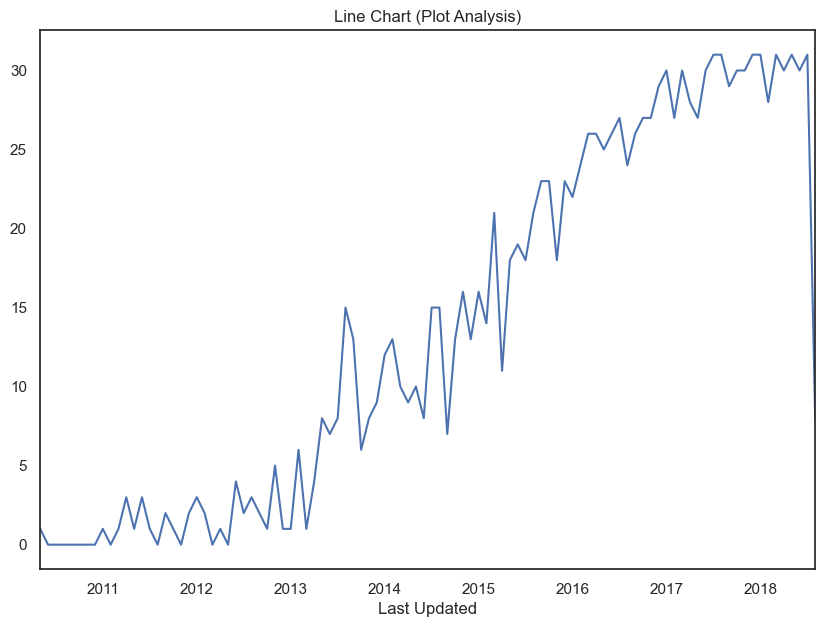

In [60]:
y.plot(figsize=(10, 7))
plt.title("Line Chart (Plot Analysis)")
plt.show()

### Plot Analysis Decomposition

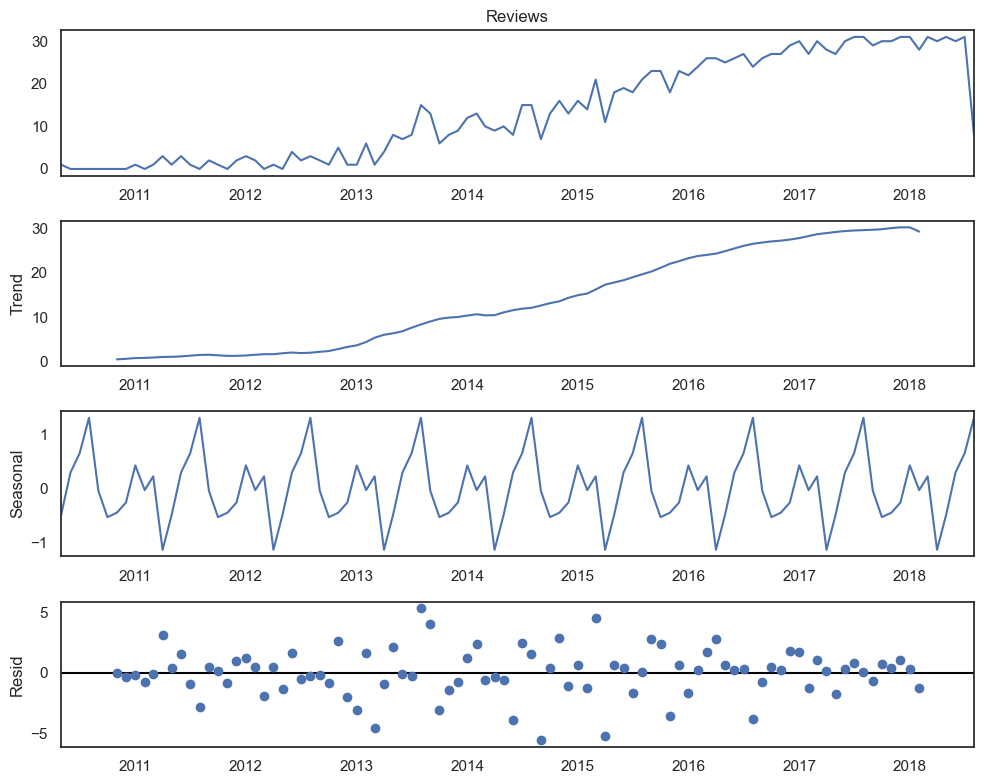

In [61]:
rcParams['figure.figsize'] = (10,8)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [62]:
# Months (January to December)
data['updated_month'] = pd.to_datetime(data['Last Updated']).dt.month

<ipython-input-62-1b47eaac85c5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# Create a pivot table for Content Rating and updated Month with the values set to Installs
monthly= pd.pivot_table(data=data, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)
monthly

Content Rating      Everyone  Everyone 10+    Mature 17+          Teen
updated_month                                                         
1               1.023734e+09  7.528205e+07  9.612210e+06  4.415911e+07
2               9.374498e+08  1.432210e+07  1.302151e+07  3.960808e+07
3               9.870191e+08  3.032251e+07  9.111100e+06  8.985613e+07
4               2.348286e+09  2.330000e+07  5.259000e+06  2.516297e+08
5               5.341595e+09  1.281735e+08  1.101401e+08  5.606998e+08
6               4.733240e+09  1.366727e+09  1.246521e+08  5.052352e+08
7               4.291606e+10  8.271566e+09  1.679268e+09  1.408517e+10
8               3.865649e+10  1.164721e+09  2.320342e+09  1.513281e+10
9               3.802555e+08  2.502110e+07  2.201010e+06  2.248470e+07
10              4.882008e+08  2.310100e+07  3.160000e+06  5.568018e+07
11              1.339604e+09  6.031500e+07  1.070300e+06  7.924384e+07
12              1.076108e+09  8.420000e+06  1.286011e+07  5.171091e+07

### Stacked Bar Chart

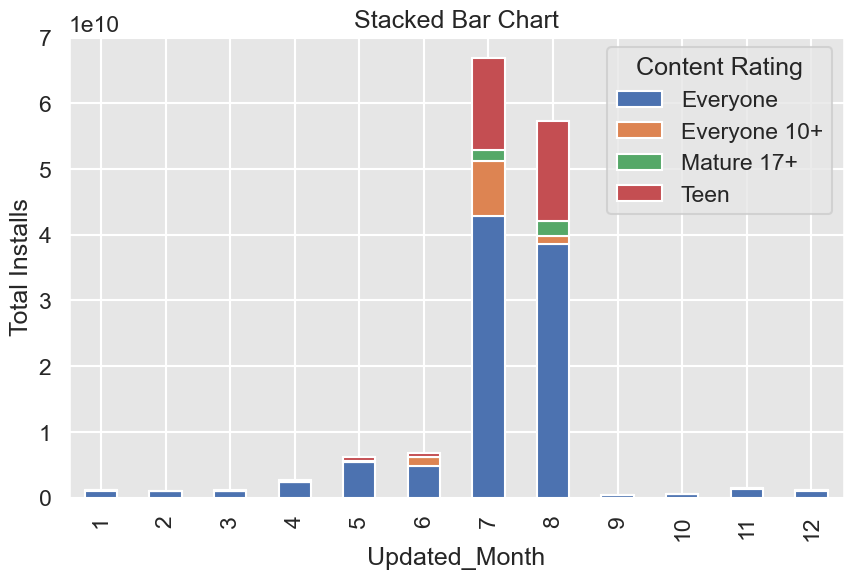

In [64]:
# Set seaborn plotting aesthetics
sb.set_style("darkgrid", {"axes.facecolor": ".9"})

# Set seaborn context
sb.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})

# Stacked Bar Chart
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title("Stacked Bar Chart")
plt.xlabel("Updated_Month")
plt.ylabel("Total Installs")
plt.show()

# Exploratory Data Analysis 

# Second Dataset: COVID-19
https://www.kaggle.com/datasets/imdevskp/corona-virus-report

In [65]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio

In [66]:
# Load the dataset
df=pd.read_csv("country_wise_latest.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'country_wise_latest.csv'

## Collect and Prepare the Data.

In [ ]:
# Printing firt 5 columns of the dataframe
df.head()

In [ ]:
# Number of rows and columns of the dataframe
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))


In [ ]:
# Get information about this data 
df.info()

So we notice that we have 2 categoricall data and the rest are quantitive data

In [ ]:
# A statistical summary for quantitative data
df.describe()

In [ ]:
# Column Names
df.columns

In [ ]:
# Find the Statistics of categorical data
print(df['WHO Region'].value_counts())
print(df['WHO Region'].describe())

In [ ]:
# Find the Statistics of categorical data
print(df['Country/Region'].value_counts())
print(df['Country/Region'].describe())

In [ ]:
# Total number of COVID-19 cases
Total_Confirmed=df['Confirmed'].sum()+df['New cases'].sum()
Total_Confirmed

In [ ]:
# Total number of Recovered people
Total_Recovered=df['Recovered'].sum()+df['New recovered'].sum()
Total_Recovered

In [ ]:
# Total number of deaths
Total_deathes=df['Deaths'].sum()+df['New deaths'].sum()
Total_deathes

In [ ]:
# Total number of unique values in each feature
df.nunique()

In [ ]:
# Unique values of Countries
df["Country/Region"].unique()

In [ ]:
# Count of countries
df["Country/Region"].value_counts()

In [ ]:
whoRegion = df['WHO Region'].unique()
whoRegion

## Data Cleaning Process

In [ ]:
# Checking each column in the data for null values
df.isnull().sum()

In [ ]:
# Checking for duplicated values
df.duplicated().sum()

## Data Visualisation 

### Kernel Density plots 

In [ ]:
# Task Abstraction: Show the Density of the cases of COVID-19 by the region.
# For visualizing the distribution of observations in a dataset, analogous to a histogram
# Get the needed features to discover the patterns of them 

category=df[['Confirmed','Active','Recovered','Deaths', 'WHO Region']]

In [ ]:
# Kernel Density plots grouped by Category

sb.pairplot(category, hue='WHO Region', height=2, diag_kind="kde"); 

In [ ]:
# Get the Deaths cases by the region
death_region = df.groupby('WHO Region')[['WHO Region','Deaths']].sum().sort_values(by=['Deaths'],ascending=False).head(10)
death_region

In [ ]:
# Get the Recovered cases by the region
recovered_region = df.groupby("WHO Region")[['WHO Region', "Recovered"]].sum().sort_values(by = ["Recovered"], ascending = False).head(10)
recovered_region

In [ ]:
# Merge Deaths and Recovered by their Region
dr_merge = death_region.copy()
dr_merge["Recovered"] = recovered_region["Recovered"]
dr_merge

In [ ]:
dr_merge["Recovered"].values

### Grouped bar chart

In [ ]:
# Task Abstraction: Show the the total number of Recovered and Deaths cases by the Region.

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

recovered_list = dr_merge["Recovered"]
deaths_list = dr_merge["Deaths"]

# Set position of bar on X axis
br1 = np.arange(len(recovered_list))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, recovered_list, color ='green', width = barWidth,
        edgecolor ='grey', label ='Recovered',alpha=0.5)
plt.bar(br2, deaths_list, color ='red', width = barWidth,
        edgecolor ='grey', label ='Deaths', alpha=0.7)

# Adding Xticks
plt.xlabel('WHO Regions', fontweight ='bold', fontsize = 15)
plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(recovered_list))],
        ['Americas', 'Europe',"Eastern Mediterranean", 'South-East Asia', 'Western Pacific', 'Africa'])
plt.xticks(rotation = 70)
 
plt.legend()
plt.show()

### Grouped Horizontal Bar Chart

In [ ]:
# Task Abstraction: Show the most countries have number of patients of COVID-19 through each region
# Sorting in descending order of percentage of the confirmed cases in the countries
# Get the percentage of the countries by regions of the data which have confirmed cases for covid-19
# Consideration of cases by Country in percentage

cases_country = df.groupby(['Country/Region'])['Confirmed'].sum().sort_values(ascending=False)
percent_cases = (cases_country / cases_country.sum())*100
percent_cases

In [ ]:
fig = px.bar( df,x=percent_cases, y='Country/Region' ,color='WHO Region',orientation='h',
             labels={"percent_cases":"Country",
                     'Country/Region':"Country",
                      'WHO Region':"Region" }
            ,title="The percentage of COVID-19 in the world")
fig.show()

### Donut pie chart

In [ ]:
# Task Abstraction: Show the number of patients of COVID-19 in each region
# Get the region of the countries 
# Order the result descending

whoRegionCountries_df = df.groupby(['WHO Region'])[['Country/Region']].count()
whoRegionCountries_df.set_axis(['Total Countries'], axis= 'columns',inplace=True)
whoRegionCountries_df.sort_values(['Total Countries'], ascending=False)

In [ ]:
fig = px.pie(whoRegionCountries_df, values='Total Countries',names=whoRegionCountries_df.index, title='Countries in WHO Region', hole= 0.6)
fig.show()

We conclude that Africa is the region that has the most number of cases of Covid-19

### Horizontal Bar Chart 

In [ ]:
# Task Abstraction: Show the highest countries in the number of deaths cases caused by COVID-19
# Get the number of Deaths according to the Region 
# Sorting in descending order for the number of Deaths
# Show top 20 countries have most number of Deaths

DeathCaseinCountries = df[['Country/Region','Deaths']].sort_values(by=['Deaths'],ascending=False).head(20)
DeathCaseinCountries
fig = px.bar(DeathCaseinCountries, x='Deaths', y='Country/Region',color='Country/Region', title='Top 20 Countries of Deaths Cases')
fig.show()

We conclude that US has the most number of deaths 

### Donut pie chart

In [ ]:
#Task Abstraction: Show the most Regions have number of Recovered of COVID-19 

fig = px.pie(df, values = "Recovered", names = "WHO Region", title = "Total Recovered in the WHO Region", hole = 0.4)
fig.show()

In [ ]:
# Merge the Active, Deaths, and Recovered cases and group them by Region
whoRegionCountriesActive_df = df.groupby(['WHO Region'])[['Active','Deaths','Recovered']].sum()
whoRegionCountriesActive_df.sort_values(['Active'], ascending=False, inplace=True)
whoRegionCountriesActive_df

### Grouped Bar Chart

In [ ]:
# Task Abstraction: Show the Recovered, Active ,and Deaths in each Region

anchos = [0.2] * 6
fig = go.Figure()
fig.add_trace(go.Bar(x = whoRegionCountriesActive_df.index,
                     y = whoRegionCountriesActive_df['Recovered'], 
                     width = anchos, name = 'Recovered Case'))
fig.add_trace(go.Bar(x = whoRegionCountriesActive_df.index,
                     y = whoRegionCountriesActive_df['Active'], 
                     width = anchos, name = 'Active Case'))
fig.add_trace(go.Bar(x = whoRegionCountriesActive_df.index,
                     y = whoRegionCountriesActive_df['Deaths'], 
                     width = anchos, name = 'Death Case'))


fig.update_layout(title =  "Regions Stats",
                  barmode = 'group', title_font_size = 40)
fig.update_xaxes(title_text = 'WHO Regions')
fig.update_yaxes(title_text = "No. of cases")
# fig.write_image(path + "figclust1.png")
fig.show()

From above we conclude that Americas Region has the highest records of deaths due to the highest records of Active cases, let's see more about that using correlation.

### Correlation Heatmap

In [ ]:
plt.figure(figsize=(10,5))
corr= category.corr()
sb.heatmap(corr, annot=True)
plt.show()

### 3D Scatter plot

In [ ]:
# Task Abstraction: Show the pattern of Recovered, Active, and Deaths of COVID-19 

pio.templates.default = "plotly_dark"
px.scatter_3d(df,x="Confirmed",y="Deaths",z="Recovered")

### Funnel Plot

In [ ]:
# Task Abstraction: Show the number of Total(Confirmed), Recovered, Active ,and Deaths Cases
# Sorting values in descending order 
# Annotate all the values

fig = go.Figure(go.Funnel(
    y = ["Confirmed", "Recovered", "Active", "Deaths"],
    x = [df['Confirmed'].sum(),df['Recovered'].sum(),df['Active'].sum(),df['Deaths'].sum()],
    textposition = "inside",
    textinfo = "value+percent initial",
    text="Confirmed",
    opacity = 0.9, 
    marker = {"color": ["Red", "Green", "Yellow", "Crimson"],"line": {"width": 2, "color": 'Black'}},
    connector = {"line": {"color": "Black", "dash": "dot", "width": 3}} 
                             ))
fig.update_layout(
    template="plotly_white",
    title={
        'text': "Cases around the world",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout( width=700,height=600)
fig.show()

### Choropleth Map

In [ ]:
# Task Abstraction: Show the Total(Confirmed) Cases in each Country/Region 
# Animate them over time

fig = px.choropleth(df, locations=df['Country/Region'],
                    color=df['Confirmed'], locationmode='country names',
                    hover_name=df['Country/Region'],hover_data =['Country/Region','Confirmed'],
                    color_continuous_scale='ylgnbu',template='plotly_white', animation_frame = 'Country/Region')
fig.update_layout(
    title='Confirmed Cases In Each Country over Time',
)
fig.update_layout( width=700,height=600)
fig.show()

### Choropleth Map

In [ ]:
# Task Abstraction: Show the Total(Confirmed) Cases in each WHO Region
# Animate them over time
# I used the Blue-Orange color palette because it is suitable for those who have color blindness

fig = px.choropleth(df, locations=df["Country/Region"],
                    color=df['Confirmed'], locationmode='country names',
                    hover_name=df['WHO Region'],hover_data =['WHO Region','Confirmed'],
                    color_continuous_scale='thermal',template='plotly_white', animation_frame = 'WHO Region')
fig.update_layout(
    title='Confirmed Cases In Each WHO Region over Time',
)
fig.update_layout( width=700,height=600)
fig.show()

In [ ]:
# Grouping WHO Region by Confirmed, Deaths, Recovered and Active cases
c_df = df.groupby(df["WHO Region"])['Confirmed','Deaths','Recovered','Active'].sum()
c_df.index = c_df.index.set_names(['WHO Region'])
c_df = c_df.reset_index()
c_df = c_df.melt(id_vars=['WHO Region','Confirmed'],var_name= 'kind', value_name='Cases')

### Sun Burst Plot

In [ ]:
# Task Abstraction: Show the state of each WHO Region and whether the cases are Active or Recovered
# Annotate all the values

fig = px.sunburst(c_df, path=['WHO Region','Confirmed','kind'], values='Cases',title='Continent-wise overview',color='Cases',
                  color_continuous_scale='rdbu')
fig.update_layout( width=800,height=600)

fig.show()

The above figure will give you an overall number for the cases continent-wise. Click on any continent to get a view of active cases, recovered cases and deaths.